In [2]:
import pandas as pd
from merlion.utils import TimeSeries

In [3]:
# 加载数据
air_pass = pd.read_csv("data/airline-passengers.csv")
# 把日期设置为索引
air_pass.set_index('Month', inplace=True)
air_pass.index = pd.to_datetime(air_pass.index)
# 一定要确保freq设定好
air_pass.index.freq = 'MS'

# 读取为TimeSeries对象
air_pass_ts = TimeSeries.from_pd(air_pass, freq='MS')
print(air_pass_ts.is_aligned)

True


In [4]:

# 使用 .bisect() 函数切分数据为训练集和测试集
# 我们希望预估未来6个月的乘客量
air_pass_ts_train, air_pass_ts_test = air_pass_ts.bisect('1960-07-01')

In [5]:
from merlion.models.forecast.trees import LGBMForecaster, LGBMForecasterConfig
# 设定模型配置
lgbm_config = LGBMForecasterConfig(maxlags = 30,
                                   max_forecast_steps=len(air_pass_ts_test)
                                  )
# 初始化模型
lgbm = LGBMForecaster(lgbm_config)
# 拟合模型
lgbm.train(air_pass_ts_train)
# 预估
lgbm_fc = lgbm.forecast(air_pass_ts_test.time_stamps)

Inferred granularity <MonthBegin>


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 108, number of used features: 30
[LightGBM] [Info] Start training from score 307.055556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

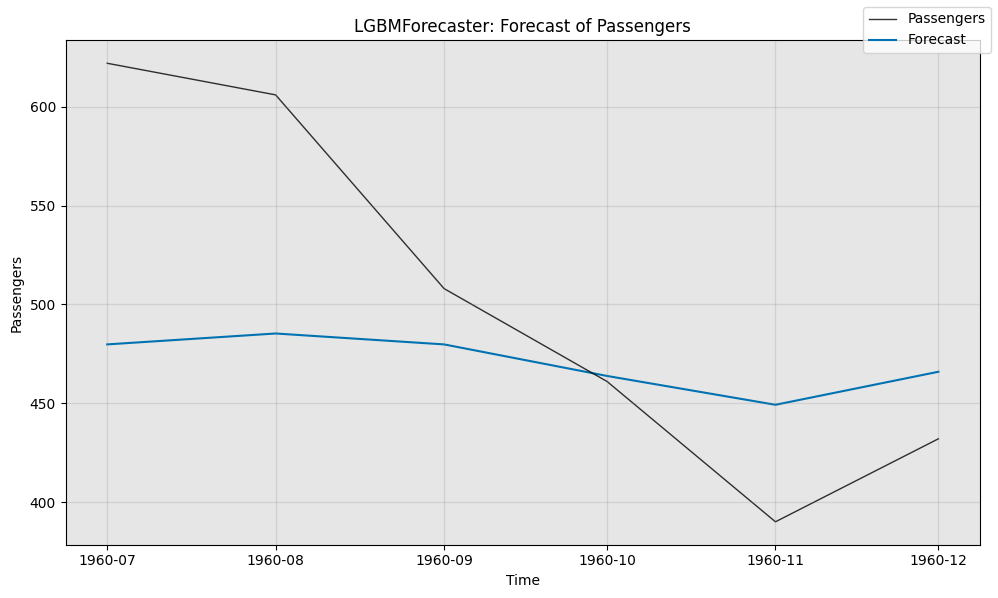

In [6]:
import matplotlib.pyplot as plt
fig, ax = lgbm.plot_forecast(time_series=air_pass_ts_test)
plt.show()